Importing libraries and labeling the columns.

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [114]:
gdp_data=pd.read_csv("indiaGDP.csv",header=None)
gdp_data.head()

,0,1,2,3,4
0,1960,37.03,18.90,82,3.85
1,1961,39.23,3.72,85,3.85
2,1962,42.16,2.93,90,5.30
3,1963,48.42,5.99,101,12.51
4,1964,56.48,7.45,116,14.25


In [115]:
labels=['Year','GDP','Growth','Per Capita Income','Annual Growth (PCI)']
gdp_data.columns=labels
gdp_data.head()

,Year,GDP,Growth,Per Capita Income,Annual Growth (PCI)
0,1960,37.03,18.90,82,3.85
1,1961,39.23,3.72,85,3.85
2,1962,42.16,2.93,90,5.30
3,1963,48.42,5.99,101,12.51
4,1964,56.48,7.45,116,14.25


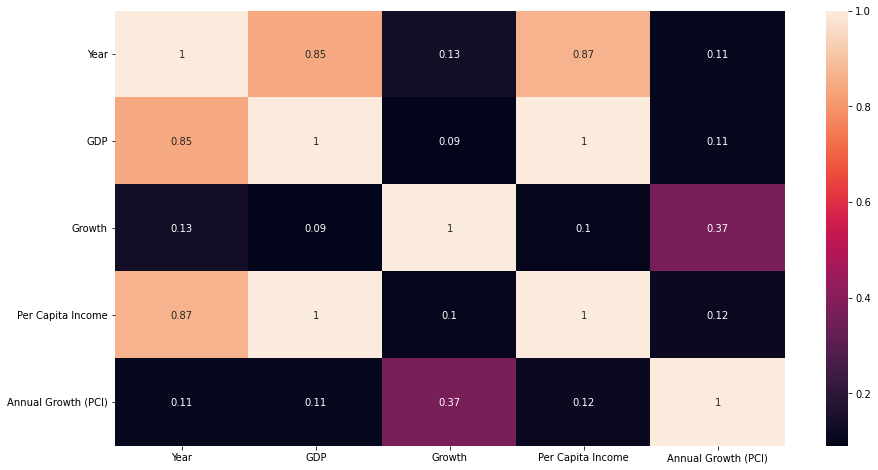

In [116]:
plt.figure(figsize= (15,8))
correlation = gdp_data.corr()
sns.heatmap(correlation,annot=True)

In [117]:
gdp_new=gdp_data[['Year','GDP']].copy()
gdp_new.head()

,Year,GDP
0,1960,37.03
1,1961,39.23
2,1962,42.16
3,1963,48.42
4,1964,56.48


In [118]:
gdp_only=gdp_data['GDP'].copy()
gdp_only.head()
gdp_only=np.array(gdp_only)
gdp_only

array([  37.03,   39.23,   42.16,   48.42,   56.48,   59.55,   45.87,
         50.13,   53.09,   58.45,   62.42,   67.35,   71.46,   85.52,
         99.53,   98.47,  102.72,  121.49,  137.3 ,  152.99,  186.33,
        193.49,  200.75,  218.26,  212.16,  232.51,  248.99,  279.03,
        296.59,  296.04,  320.98,  270.11,  288.21,  279.3 ,  327.28,
        360.28,  392.9 ,  415.87,  421.35,  458.82,  468.39,  485.44,
        414.94,  607.7 ,  709.15,  820.38,  940.26, 1216.74, 1198.9 ,
       1341.89, 1675.62, 1823.05, 1827.64, 1856.72, 2039.13, 2103.59,
       2294.8 , 2651.47, 2702.93, 2831.55, 2667.69, 3173.4 ])

In [119]:
print("Shape: ",gdp_new.shape)
print("\nData Types:\n",gdp_new.dtypes)

Shape:  (62, 2)

Data Types:
 Year      int64
GDP     float64
dtype: object


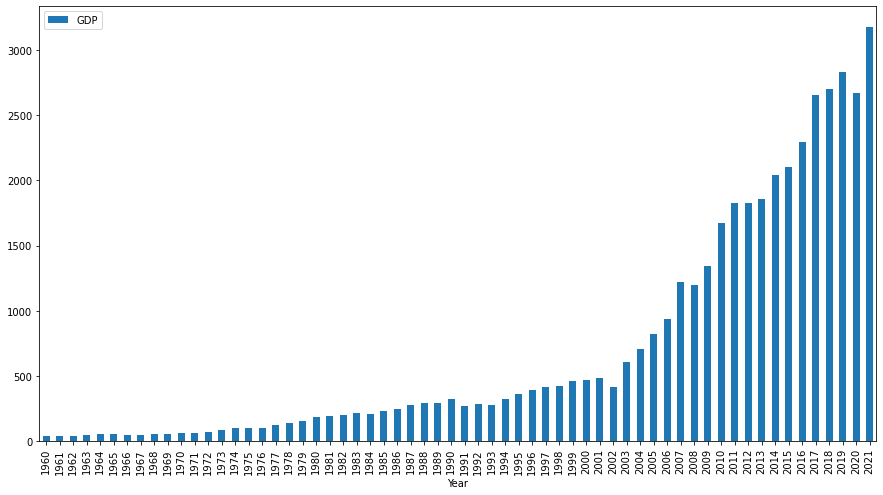

In [120]:
gdp_new.plot.bar('Year','GDP',figsize=(15,8))

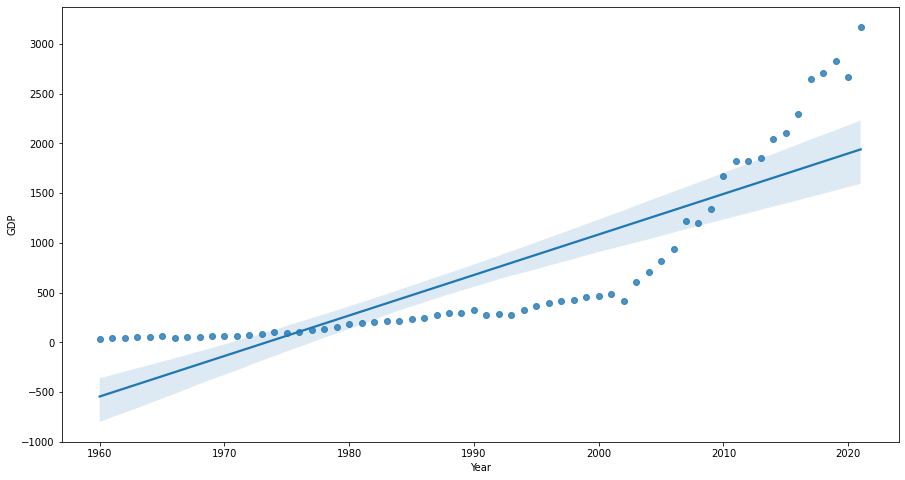

In [121]:
plt.figure(figsize=(15,8))
sns.regplot(x='Year',y='GDP',data=gdp_new)

In [479]:
train,test=train_test_split(gdp_new,test_size=0.3,train_size=0.7,shuffle=True,random_state=30)

In [480]:
gdp_train=train['GDP'].copy()
gdp_train=np.array(gdp_train)
gdp_train

array([  58.45, 1198.9 ,  296.04,   59.55, 1341.89,  279.3 ,  392.9 ,
         53.09,  232.51,   99.53,  414.94,  248.99, 2651.47,  296.59,
         85.52, 2103.59,   98.47,   67.35,   37.03,  279.03,   45.87,
        102.72, 2294.8 ,  421.35,  709.15,  137.3 ,  360.28, 2702.93,
         39.23,   50.13,  485.44,   48.42,  940.26,  121.49, 1856.72,
         42.16,  218.26,   71.46, 1827.64, 2831.55,  820.38, 3173.4 ,
        415.87])

In [481]:
gdp_test=test['GDP'].copy()
gdp_test=np.array(gdp_test)
gdp_test

array([  62.42,  327.28,  212.16,  270.11, 1675.62,  193.49, 2039.13,
        607.7 ,  200.75,  468.39, 2667.69,  288.21,  152.99,  320.98,
        458.82,   56.48,  186.33, 1823.05, 1216.74])

In [16]:
pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-mngjicld
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-mngjicld
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Resolved https://github.com/scikit-learn-contrib/py-earth to commit 400f84d435b7277124535c09ca32132c1d0eaa74
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-contrib-py-earth: filename=sklearn_contrib_py_earth-0.1.0+16.g400f84d-cp38-cp38-linux_x86_64.whl size=4476292 sha256=a710af2e84bae2a80d12d8d5d3c81408c51dcc833ddfd29a90b39fb7e126d3cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-ek15g8xl/wheels/8a/33/e4/b577aeaf3435222ffd76339bd728390afc103237af5c

In [482]:
from pyearth import Earth

In [483]:
model = Earth().fit(train.iloc[:,:1],train.iloc[:,1:])

In [484]:
pred=model.predict(test.iloc[:,:1])
pred2=model.predict(train.iloc[:,:1])
print(model.summary())
print("\nAccuracy on TESTING set: %.2f"%((sm.r2_score(gdp_test, pred))*100))
print("Accuracy on TRAINING set: %.2f"%((sm.r2_score(gdp_train,pred2))*100))

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      738.114      
h(Year-2005)    No      149.448      
h(2005-Year)    No      -52.9606     
h(Year-1998)    Yes     None         
h(1998-Year)    No      42.9284      
Year            Yes     None         
-------------------------------------
MSE: 2723.2878, GCV: 4230.5054, RSQ: 0.9966, GRSQ: 0.9950

Accuracy on TESTING set: 98.10
Accuracy on TRAINING set: 99.66


Testing Set


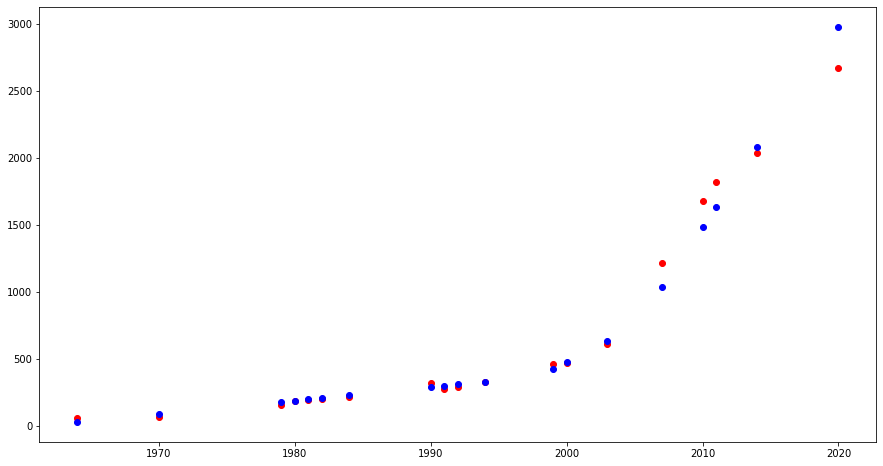

In [485]:
print("Testing Set")
plt.figure(figsize=(15,8))
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],pred,'bo')
plt.show()

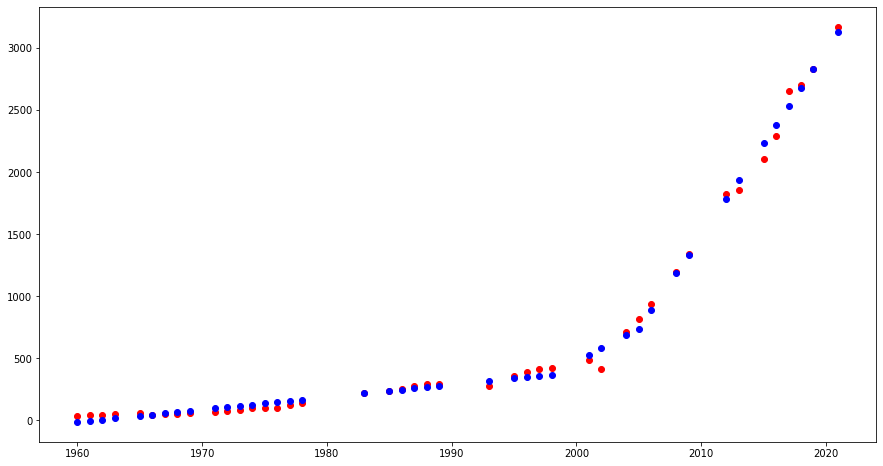

In [486]:
plt.figure(figsize=(15,8))
plt.plot(train['Year'],train['GDP'],'ro')
plt.plot(train['Year'],pred2,'bo')
plt.show()

In [491]:
print("=================================================")
year=int(input("Enter the year to find the PREDICTED GDP OF:"))
print("=================================================\n")

gdp=model.predict([[year]])
gdp_gro=gdp-model.predict([[2022]])

print("PREDICTED GDP for",year,"          : %.2f"%gdp,"Billion USD")
print("PREDICTED GROWTH IN GDP from 2022: %.2f"%gdp_gro,"Billion USD")
print("=================================================\n")

Enter the year to find the PREDICTED GDP OF:2000

PREDICTED GDP for 2000           : 473.31 Billion USD
PREDICTED GROWTH IN GDP from 2022: -2805.42 Billion USD

